 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [254]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [255]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whalereturns_df = pd.read_csv(whale_returns_csv)
whalereturns_df.set_index(pd.to_datetime(whalereturns_df['Date'], infer_datetime_format=True), inplace=True)
whalereturns_df = whalereturns_df.drop(columns=["Date"])
whalereturns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [256]:
# Count nulls
whalereturns_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [257]:
# Drop nulls
whalereturns_df = whalereturns_df.dropna()
whalereturns_df.isnull().sum()
whalereturns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [258]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algoreturns_df = pd.read_csv(algo_returns_csv)
algoreturns_df.set_index(pd.to_datetime(algoreturns_df['Date'], infer_datetime_format=True), inplace=True)
algoreturns_df = algoreturns_df.drop(columns=["Date"])
algoreturns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [259]:
# Count nulls
algoreturns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [260]:
# Drop nulls
algoreturns_df = algoreturns_df.dropna()
algoreturns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [261]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500history_df = pd.read_csv(sp500_history_csv)
sp500history_df.set_index(pd.to_datetime(sp500history_df['Date'], infer_datetime_format=True), inplace=True)
sp500history_df.head()


,Date,Close
Date,,
2019-04-23,23-Apr-19,$2933.68
2019-04-22,22-Apr-19,$2907.97
2019-04-18,18-Apr-19,$2905.03
2019-04-17,17-Apr-19,$2900.45
2019-04-16,16-Apr-19,$2907.06


In [262]:
# Check Data Types
print(whalereturns_df.dtypes)
print(algoreturns_df.dtypes)
print(sp500history_df.dtypes)

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object
Algo 1    float64
Algo 2    float64
dtype: object
Date     object
Close    object
dtype: object


In [263]:
# Fix Data Types: remove dollar signs and convert data types
sp500history_df['Close'] = sp500history_df['Close'].str.replace('$', '')
sp500history_df['Close'].dtypes
sp500history_df['Close']= sp500history_df['Close'].astype('float')
sp500history_df['Close'].dtypes



dtype('float64')

In [264]:
# Calculate Daily Returns: Convert the S&P 500 closing prices to daily returns.
sp500_return = sp500history_df['Close'].pct_change()
sp500_return.head()

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
Name: Close, dtype: float64

In [265]:
# Drop nulls

sp500_return = sp500_return.dropna().copy()
sp500_return.isnull().sum()
sp500_return 

Date
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
2019-04-15   -0.000509
                ...   
2012-10-05    0.003469
2012-10-04    0.000322
2012-10-03   -0.007123
2012-10-02   -0.003611
2012-10-01   -0.000872
Name: Close, Length: 1648, dtype: float64

In [266]:
# Rename Column from Close to S&P 500
sp500_returndf=sp500_return.to_frame(name=None)

sp500_returndf.rename(columns = {'Close':'S&P 500'}, inplace = True)
sp500_returndf.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [267]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whalereturns_df,algoreturns_df,sp500_returndf], axis='columns', join='inner')
combined_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

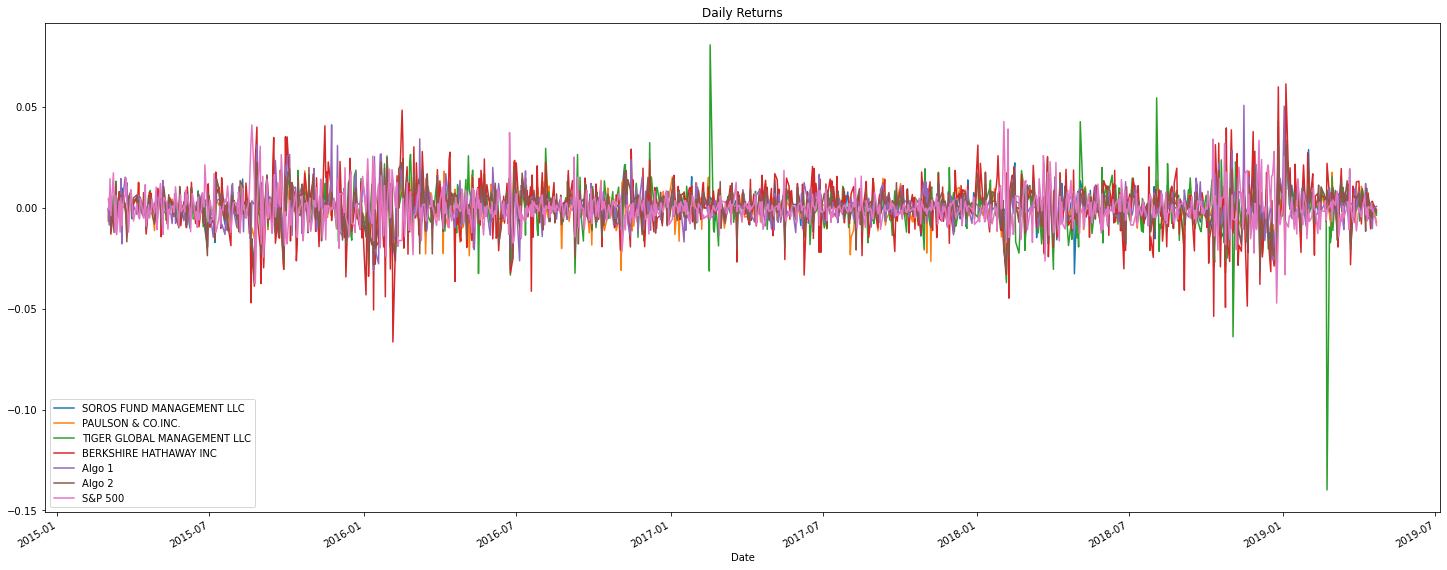

In [268]:
# Plot daily returns
combined_df_plot = combined_df.plot(figsize=(25,10),legend=True,title="Daily Returns")

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

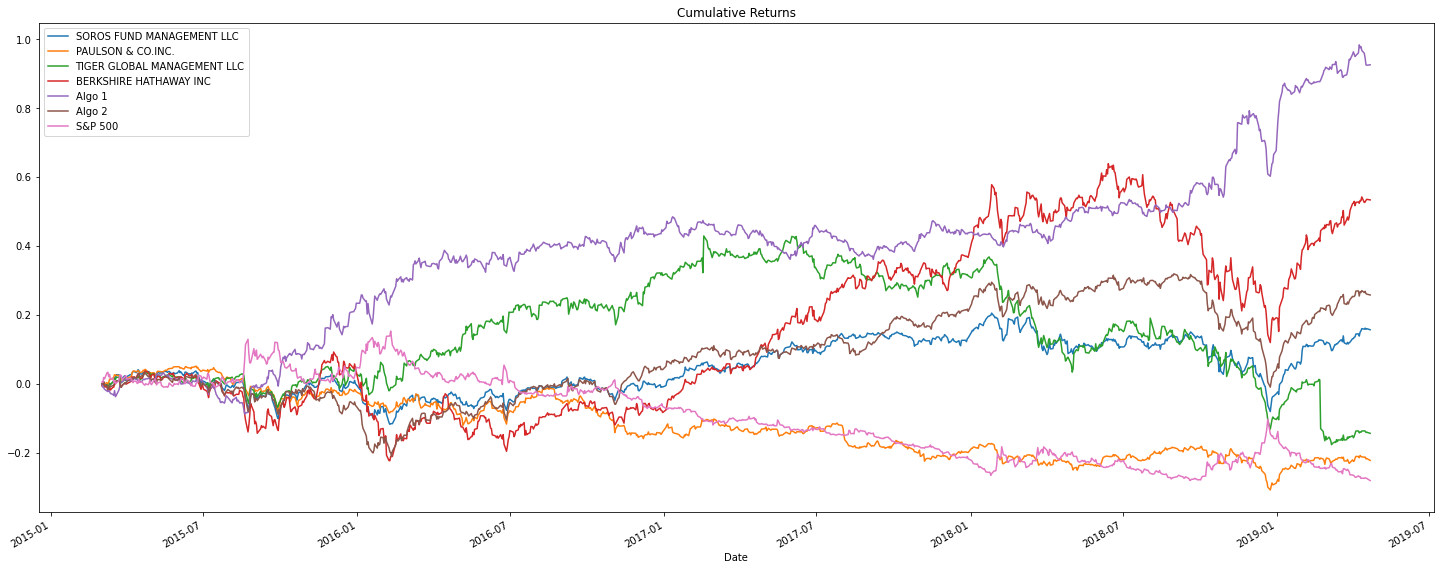

In [269]:
# Plot cumulative returns
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns.plot(figsize=(25,10),legend=True,title="Cumulative Returns")

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:>

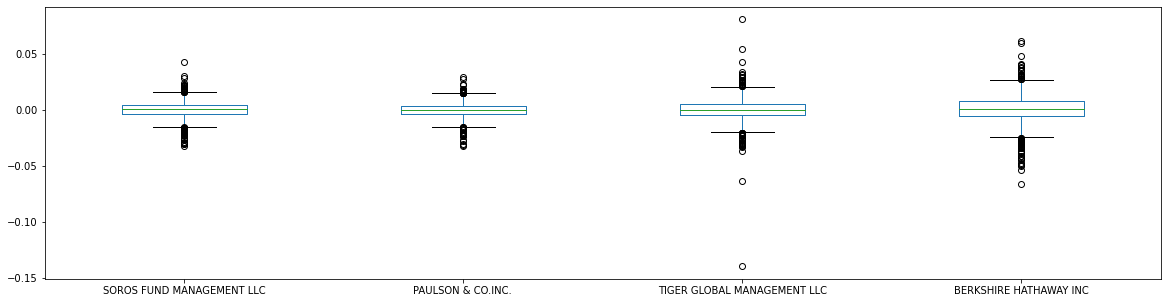

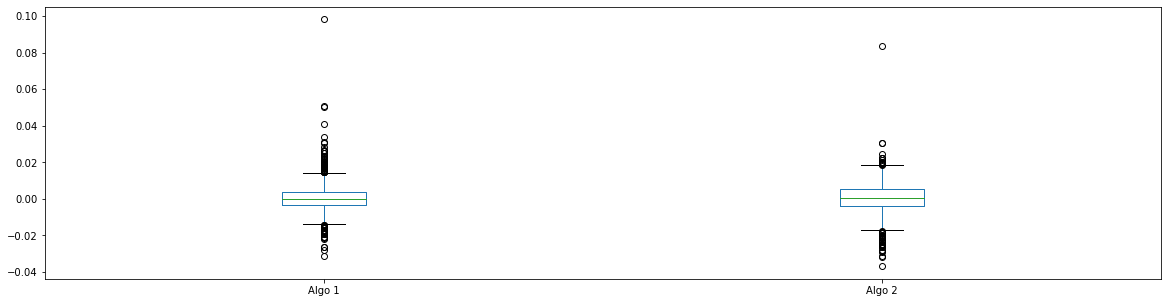

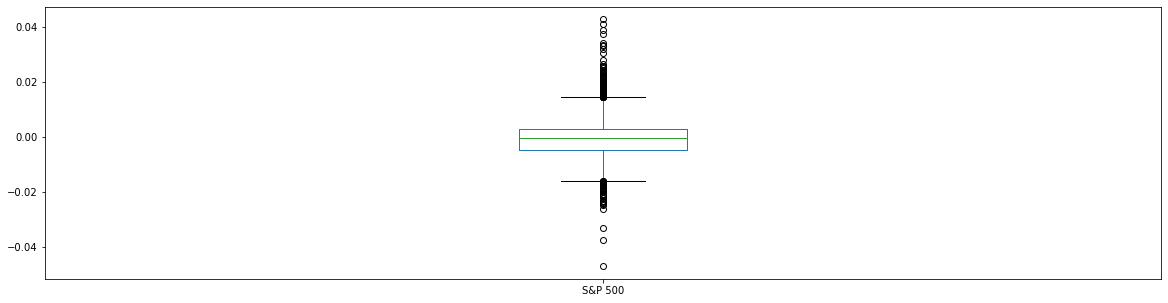

In [270]:
# Box plot to visually show risk
whalereturns_df.plot.box(figsize=(20,5))
algoreturns_df.plot.box(figsize=(20,5))
sp500_returndf.plot.box(figsize=(20,5))

In [271]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
whalereturns_std = whalereturns_df.std()
algoreturns_std = algoreturns_df.std()
sp500_returndf_std= sp500_returndf.std()

print(whalereturns_std)
print(algoreturns_std)
print(sp500_returndf_std)


SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64
Algo 1    0.007988
Algo 2    0.008466
dtype: float64
S&P 500    0.008135
dtype: float64


In [272]:
# Determine which portfolios are riskier than the S&P 500
combined_std=pd.concat([whalereturns_std, algoreturns_std, sp500_returndf_std], axis='rows', join="inner")
combined_std = combined_std.sort_values(ascending=False)
print(combined_std)

#Berkshire, Tiger, Algo 2


BERKSHIRE HATHAWAY INC         0.012831
TIGER GLOBAL MANAGEMENT LLC    0.010824
Algo 2                         0.008466
S&P 500                        0.008135
Algo 1                         0.007988
SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
dtype: float64


In [273]:
# Calculate the annualized standard deviation (252 trading days)
an_whalereturns_std = whalereturns_std * np.sqrt(252)
an_algoreturns_std = algoreturns_std * np.sqrt(252)
an_sp500_returndf_std = sp500_returndf_std * np.sqrt(252)

an_combined_std=pd.concat([an_whalereturns_std, an_algoreturns_std, an_sp500_returndf_std], axis='rows', join="inner")
an_combined_std = an_combined_std.sort_values(ascending=False)
print(an_combined_std)


BERKSHIRE HATHAWAY INC         0.203682
TIGER GLOBAL MANAGEMENT LLC    0.171830
Algo 2                         0.134401
S&P 500                        0.129133
Algo 1                         0.126801
SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

<AxesSubplot:xlabel='Date'>

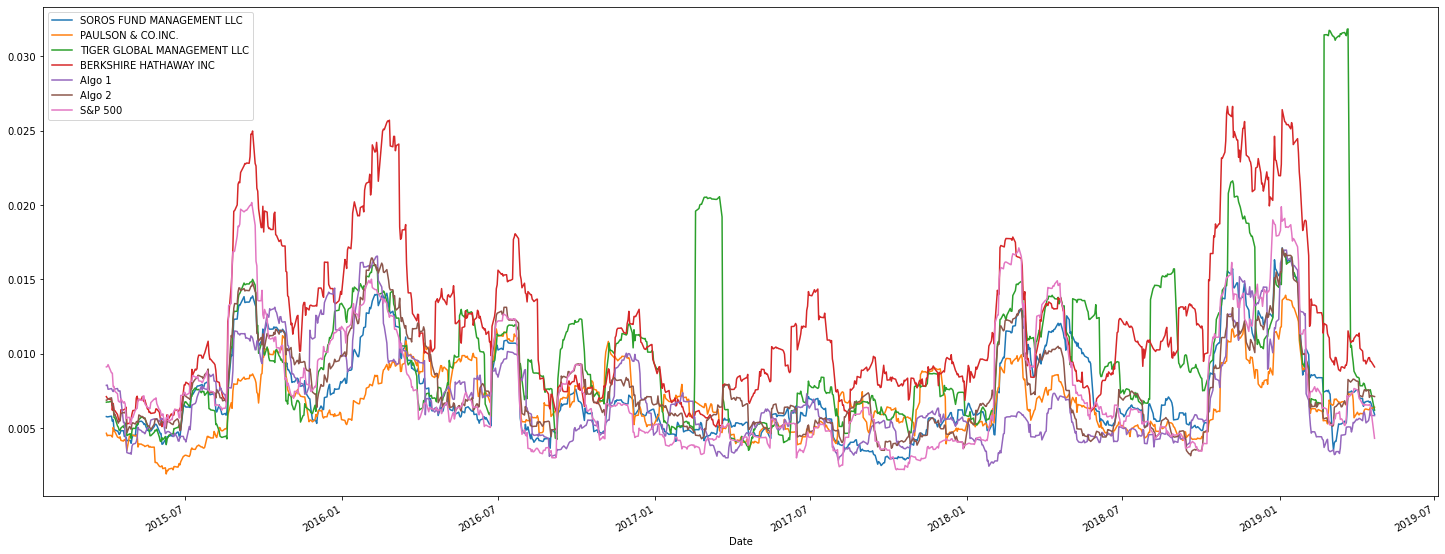

In [274]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window

combined_df.rolling(window=21).std().plot(figsize=(25,10))


In [275]:
# Construct a correlation table
correlation = combined_df.corr()
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


0.0005275302230855206


<AxesSubplot:title={'center':'Rolling 60 Day Beta Soros Fund Mgt '}, xlabel='Date'>

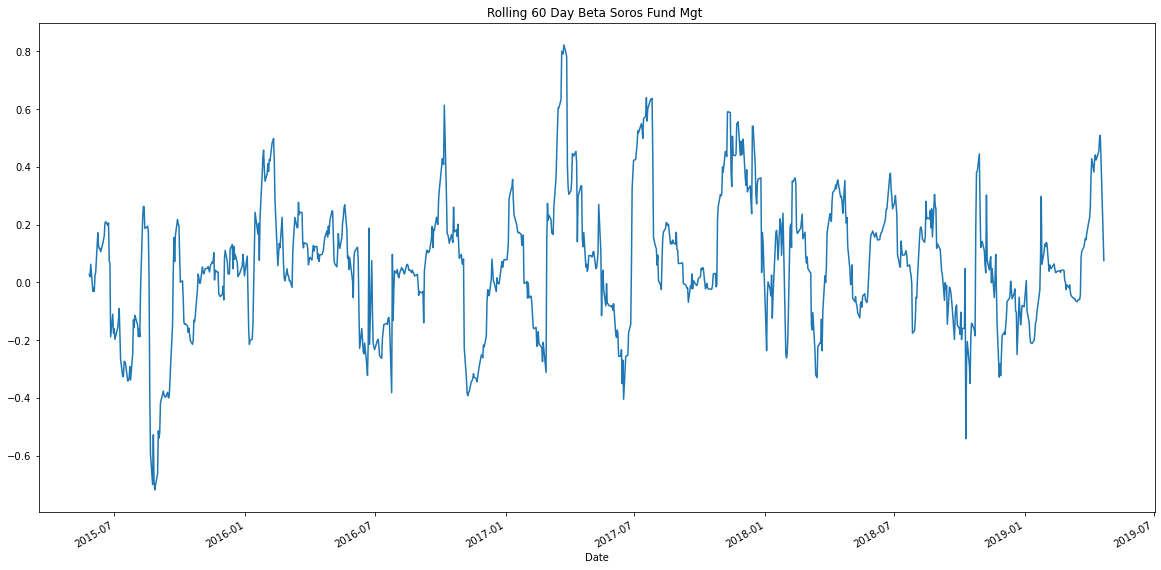

In [276]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
variance = combined_df['S&P 500'].var()
soros_covariance = combined_df['SOROS FUND MANAGEMENT LLC'].cov( combined_df['S&P 500'])
soros_beta=soros_covariance/variance
print(soros_beta)

rolling_variance = combined_df['S&P 500'].rolling(window=60).var()
rolling_soros_cov = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=21).cov(combined_df['S&P 500'])
rolling_soros_beta = rolling_soros_cov / rolling_variance


rolling_soros_beta.plot(figsize=(20, 10), title='Rolling 60 Day Beta Soros Fund Mgt ')


<AxesSubplot:title={'center':'Rolling 21-Day Beta Soros Fund Mgt using EWM '}, xlabel='Date'>

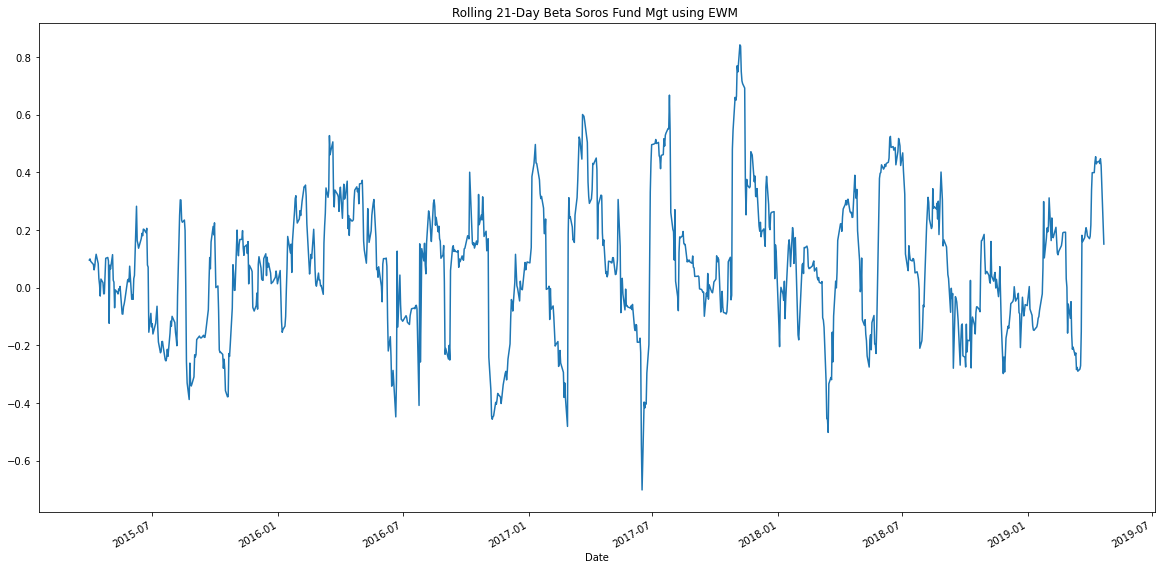

In [124]:
# Calculate a rolling window using the exponentially weighted moving average. 
rolling_variance_ewm = combined_df['S&P 500'].ewm(halflife=21).var()
rolling_soros_cov_ewm = combined_df['SOROS FUND MANAGEMENT LLC'].ewm(halflife=21).cov(combined_df['S&P 500'])
rolling_soros_beta_ewm = rolling_soros_cov_ewm / rolling_variance_ewm
rolling_soros_beta.plot(figsize=(20, 10), title='Rolling 21-Day Beta Soros Fund Mgt using EWM ')

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [279]:
# Calculate annualized Sharpe Ratios

sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios = sharpe_ratios. sort_values(ascending=False)
sharpe_ratios


Algo 1                         1.369589
BERKSHIRE HATHAWAY INC         0.606743
Algo 2                         0.484334
SOROS FUND MANAGEMENT LLC      0.342894
TIGER GLOBAL MANAGEMENT LLC   -0.130186
PAULSON & CO.INC.             -0.491422
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

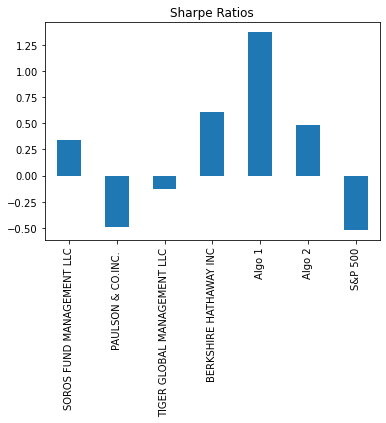

In [133]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

In [ ]:
#Yes, based on the Sharpe Ratio, per unit of risk, the Algo 1 portfolio outperforms both the market and all the whales while Algo 2 outperforms the market and all the whales except for berkshire hathaway.

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [194]:
# Read the first stock
amazon_csv = Path("AMZN.csv")
amazon_df = pd.read_csv(amazon_csv)
amazon_df.rename(columns = {'Close':'AMZN'}, inplace = True)
amazon_df.set_index(pd.to_datetime(amazon_df['Date'], infer_datetime_format=True), inplace=True)
amazon_df.index = amazon_df.index.normalize()
amazon_df.sort_index
amazon_df = amazon_df.drop(columns=["Date"])
amazon_df.head()

,AMZN
Date,
2015-03-02,385.66
2015-03-03,384.61
2015-03-04,382.72
2015-03-05,387.83
2015-03-06,380.09


In [195]:
# Read the second stock
google_csv = Path("GOOG.csv")
google_df = pd.read_csv(google_csv)
google_df.rename(columns = {'Close':'GOOG'}, inplace = True)
google_df.set_index(pd.to_datetime(google_df['Date'], infer_datetime_format=True), inplace=True)
google_df.index = google_df.index.normalize()
google_df.sort_index
google_df = google_df.drop(columns=["Date"])
google_df.head()



,GOOG
Date,
2015-03-02,569.78
2015-03-03,572.07
2015-03-04,571.80
2015-03-05,573.76
2015-03-06,566.13


In [196]:
# Read the third stock
fb_csv = Path("FB.csv")
fb_df = pd.read_csv(fb_csv)
fb_df.rename(columns = {'Close':'FB'}, inplace = True)
fb_df.set_index(pd.to_datetime(fb_df['Date'], infer_datetime_format=True), inplace=True)
fb_df.index = fb_df.index.normalize()
fb_df.sort_index
fb_df = fb_df.drop(columns=["Date"])
fb_df.head()

,FB
Date,
2015-03-02,79.75
2015-03-03,79.60
2015-03-04,80.90
2015-03-05,81.21
2015-03-06,80.01


In [284]:
# Concatenate all stocks into a single DataFrame
myportfolio = pd.concat([amazon_df,google_df,fb_df],axis='columns', join='inner')
myportfolio.head()

,AMZN,GOOG,FB
Date,,,
2015-03-02,385.66,569.78,79.75
2015-03-03,384.61,572.07,79.60
2015-03-04,382.72,571.80,80.90
2015-03-05,387.83,573.76,81.21
2015-03-06,380.09,566.13,80.01


In [285]:
# Reset the index
# Index already created in previous lines of code for each individual stock

In [289]:
# Pivot so that each column of prices represents a unique symbol
# Close price already converted to Ticker Name in previous lines of code

In [290]:
# Drop Nulls
myportfolio = myportfolio.dropna()
myportfolio.isnull().sum()

AMZN    0
GOOG    0
FB      0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [291]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]

myportfolio_returns= myportfolio.pct_change().dropna()

custom_portfolio=myportfolio_returns.dot(weights)
custom_portfolio_df=custom_portfolio.to_frame(name=None)
custom_portfolio_df.columns=['CUSTOM']
custom_portfolio_df


,CUSTOM
Date,
2015-03-03,-0.000195
2015-03-04,0.003649
2015-03-05,0.006870
2015-03-06,-0.016011
2015-03-09,-0.003033
...,...
2019-04-15,0.002235
2019-04-16,0.003482
2019-04-17,0.002653


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [292]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
my_plus_combined=pd.concat([combined_df,custom_portfolio_df],axis='columns', join='inner')
my_plus_combined.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,CUSTOM
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.000195
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,0.003649
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.006870
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.016011
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,-0.003033


In [293]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
my_plus_combined =my_plus_combined.dropna()
my_plus_combined.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
CUSTOM                         0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [294]:
# Risk

#standard deviation
custom_portfolio_std = custom_portfolio_df.std()
my_plus_combined_std=pd.concat([combined_std,custom_portfolio_std], axis='rows', join="inner")
my_plus_combined_std = my_plus_combined_std.sort_values(ascending=False)
print(my_plus_combined_std)

#annualized standard deviation
an_custom_portfolio_std = custom_portfolio_std * np.sqrt(252)

an_myplus_combined_std=pd.concat([an_combined_std,an_custom_portfolio_std], axis='rows', join="inner")
an_myplus_combined_std = an_myplus_combined_std.sort_values(ascending=False)
print(an_myplus_combined_std)



CUSTOM                         0.014984
BERKSHIRE HATHAWAY INC         0.012831
TIGER GLOBAL MANAGEMENT LLC    0.010824
Algo 2                         0.008466
S&P 500                        0.008135
Algo 1                         0.007988
SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
dtype: float64
CUSTOM                         0.237858
BERKSHIRE HATHAWAY INC         0.203682
TIGER GLOBAL MANAGEMENT LLC    0.171830
Algo 2                         0.134401
S&P 500                        0.129133
Algo 1                         0.126801
SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
dtype: float64


<AxesSubplot:xlabel='Date'>

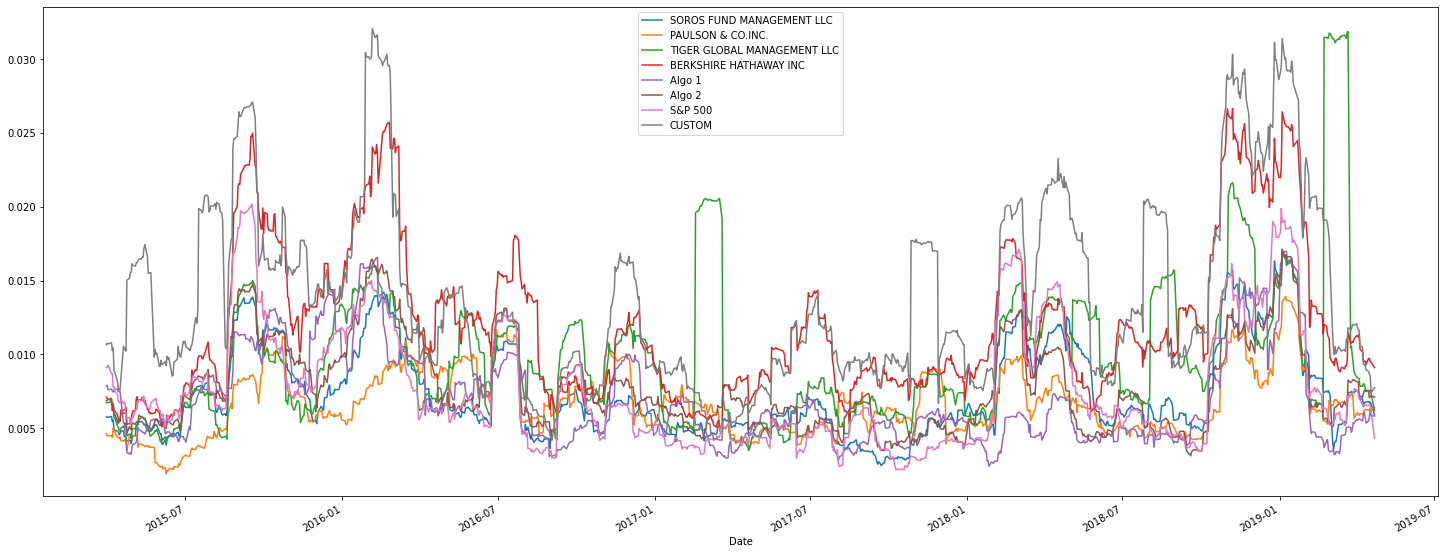

In [230]:
# Rolling
my_plus_combined.rolling(window=21).std().plot(figsize=(25,10))

In [231]:
# Annualized Sharpe Ratios

all_sharpe_ratios = (my_plus_combined.mean() * 252) / (my_plus_combined.std() * np.sqrt(252))
all_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
CUSTOM                         1.243177
dtype: float64

<AxesSubplot:title={'center':'All Sharpe Ratios'}>

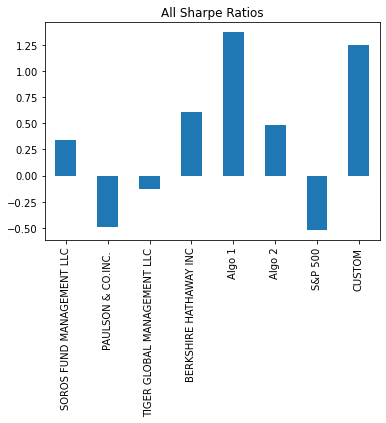

In [232]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(kind="bar", title="All Sharpe Ratios")

In [233]:
# Create a correlation analysis
all_correlation = my_plus_combined.corr()
all_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,CUSTOM
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574,0.620019
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549,0.469302
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505,0.417161
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856,0.706906
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963,0.244594
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192,0.571235
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000,-0.026621
CUSTOM,0.620019,0.469302,0.417161,0.706906,0.244594,0.571235,-0.026621,1.000000


-0.04645132188174835


<AxesSubplot:title={'center':'Rolling 60-Day Beta Custom Portfolio'}, xlabel='Date'>

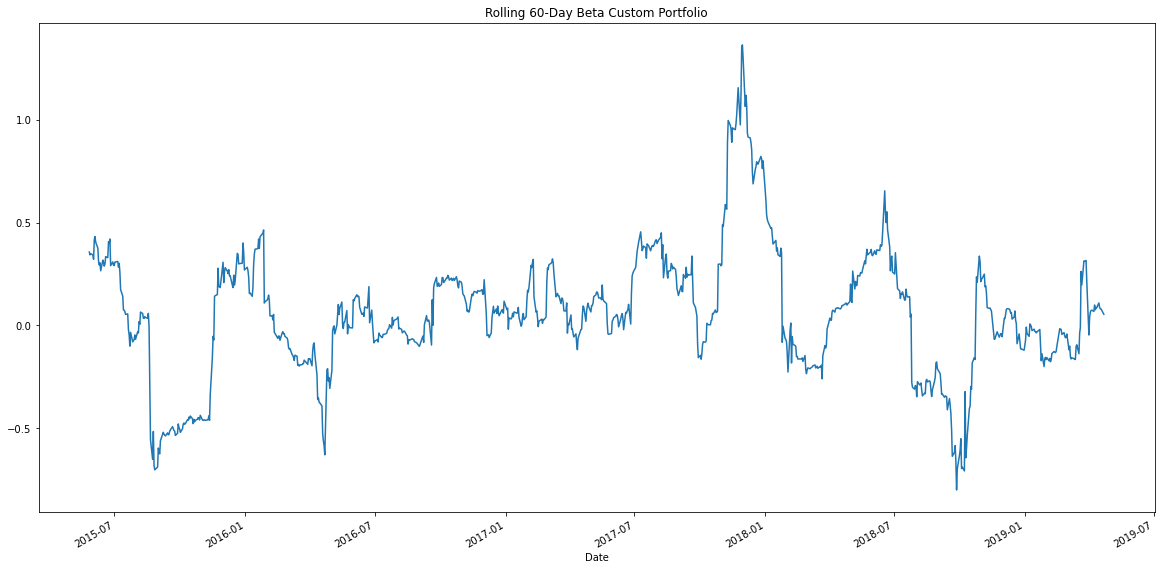

In [243]:
# Beta

sp500variance = my_plus_combined['S&P 500'].var()
custom_covariance = my_plus_combined['CUSTOM'].cov(my_plus_combined['S&P 500'])
custom_beta=custom_covariance/sp500variance
print(custom_beta)


rolling_sp500variance = my_plus_combined['S&P 500'].rolling(window=60).var()
rolling_custom_cov = my_plus_combined['CUSTOM'].rolling(window=60).cov(my_plus_combined['S&P 500'])
rolling_custom_beta = rolling_custom_cov / rolling_sp500variance


rolling_custom_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta Custom Portfolio')